<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Handwritten_Digits(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [4]:
#Printing the shapes of Train and Test data
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


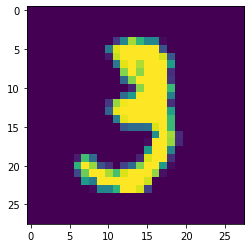

In [5]:
plt.imshow(train_images[10])

In [6]:
#Normalizing the Data
train_images = train_images/255
test_images = test_images/255

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units = 64,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units = 10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if(logs.get('accuracy')>=0.99):
      print("\nReached 99% accuracy so cancelling training")
      self.model.stop_training = True

In [10]:
model.fit(train_images,train_labels,epochs=10,callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8821
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0309 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.9920

Reached 99% accuracy so cancelling training


In [11]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.9771


[0.0880003347992897, 0.9771000146865845]